AQUI SE TRABAJA EL Analisis de data exploratorio (EDA)
- josu and gotzon

# PROBLEM DEFINITION

The bank customer churn dataset is a CSV file which contains information about a study related to customer churn in a banking institution. The information is divided into 13 different variables, organized in 13 columns, being the first one the number of rows.

The attributes analyzed by this study is splitted into the different columns, which are:

QUANTITATIVE VARIABLES: Customer identification: a unique id for each customer. Age: Customer’s age. Credit Score: A value between 300 and 850 which expresses the level of probability of a customer to pay off the debt to the bank. Tenure: Number of years a customer has been a client of the bank. Account Balance: Customer account balance. Estimated yearly salary: An estimation of the customers salary. QUALITATIVE VARIABLES Surname: Surname of the customer. Geography: Country where the customer lives. BOOLEAN VARIABLES (1 for Yes, 0 for No): HasCrCard: If customer has or not a Credit Card IsActiveMember: If the customer is an active member or not Exited: If the customer has exited the bank. Gender: If the customer is male or female.

The primary task that we are going to be intending to solve is to apply what we are going to be learning during the course such as: machine learning techniques, training processes,...In order to build and train a model capable of learning and predicting when a customer is more likely to exit the banking platform.

# 0. Libraries importation

In [1]:
# Load libraries
import pandas as pd
import numpy as np 
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Dataset import

In [2]:
data = pd.read_csv(r'src\rawDataset.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# 2. Exploratory Data Analysis (EDA)

- Dimensions of the dataset

In [3]:
data.shape

(10000, 18)

- Column data types

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

- Missing values

In [5]:
print(data.isnull().sum())

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


Result: 

There are no null values in the dataset, which facilitates the task.

- Duplicated rows

In [6]:
duplicates = data.duplicated().sum()
if duplicates > 0:
    print(f"There are {duplicates} duplicated rows in the dataset.")
else:
    print("No duplicated rows found in the dataset.")

data.drop(columns=['RowNumber','Surname','CustomerId'], inplace= True)


No duplicated rows found in the dataset.


- Categorical and Numerical columns

In [7]:
numericData = data.select_dtypes(include=[np.number])
numericData.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425


In [8]:
categoricData = data.select_dtypes(exclude=[np.number]) #we select the categoric columns
for i in categoricData.columns:                         #and get the categories of each one
    uniqueCats = categoricData[i].unique()
    print(f"{i}: {list(uniqueCats)}")

Geography: ['France', 'Spain', 'Germany']
Gender: ['Female', 'Male']
Card Type: ['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM']


- Correlation matrix

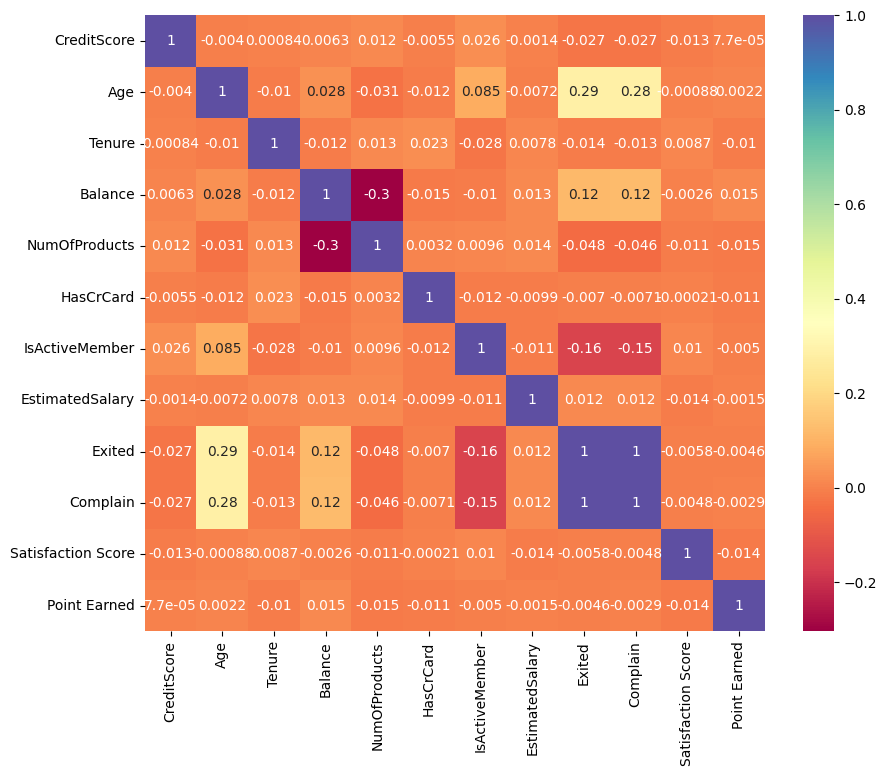

In [9]:
corr_matrix = numericData.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap= "Spectral")
plt.show()

Results: 

The heat map shows that most of the variables dont have a significant correlation value between them, except for these:
    Complain / Exit: The +1 correlation value shows that everyone who complained, ended up leaving.
    Age / Exit: +0.29 tells that there is a correlation, where, the older someone is, the more likely is that person to leave.  
    NumOfProducts / Balance : Its the highest -0.3 negative correlation, it means that people with more products tend to have a lower balance.

- Plot: Churn by geography segmented by gender

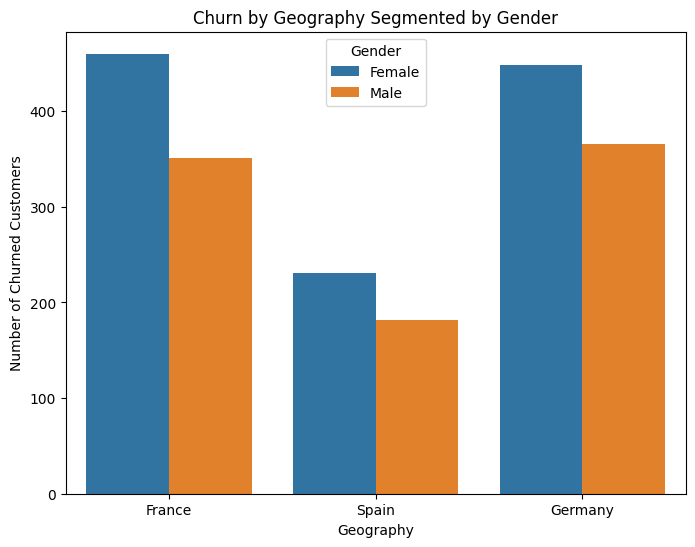

In [10]:
churned_df = data[data['Exited'] == 1]


plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', hue='Gender', data=churned_df)
plt.title('Churn by Geography Segmented by Gender')
plt.xlabel('Geography')
plt.ylabel('Number of Churned Customers')
plt.show()

Result:

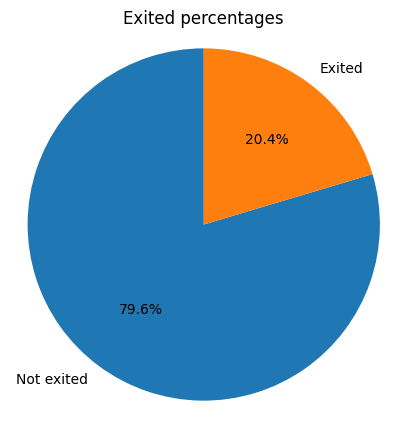

In [11]:
plt.figure(figsize= (5,5))
plot_data = (data[['Exited']].value_counts())
plt.pie(plot_data, labels=['Not exited', 'Exited'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Exited percentages')
plt.show()

- Numerical values detection

In [31]:
numeric_columns = ["CreditScore", "Age", "Balance", "EstimatedSalary", "Point Earned"]

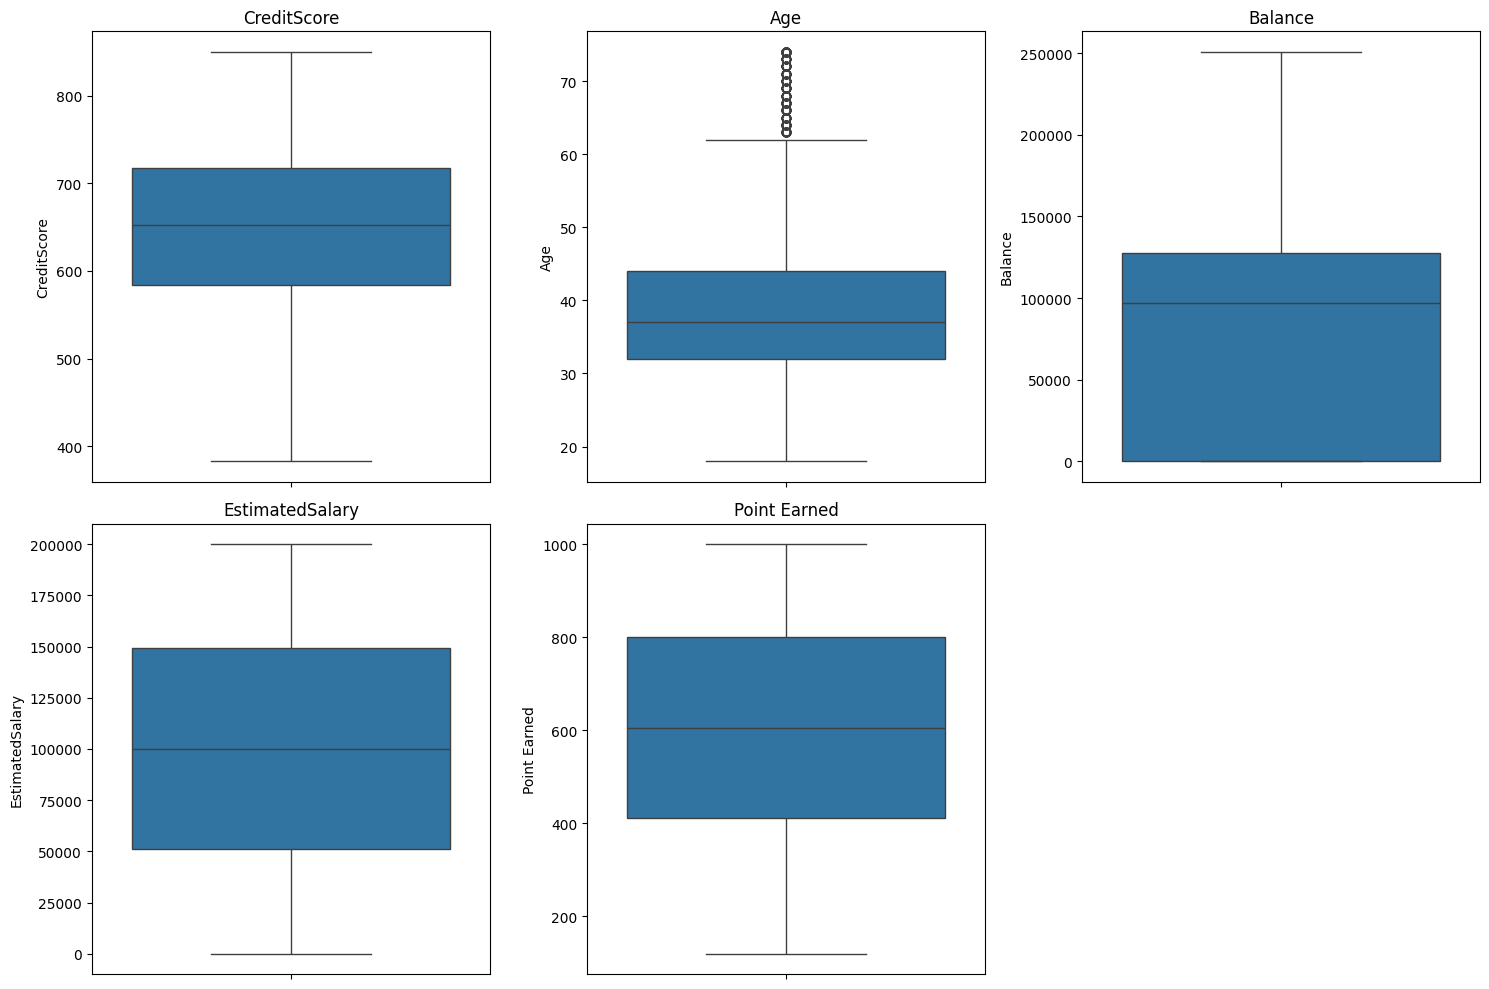

In [32]:

plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Result:

Credit Score: Some outliers under 400 (points)
    
Age: Some over 60 (yers old)
    
Others: Not significative

- Categorical values outlier detection

In [34]:
categorical_columns = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Complain', 'Satisfaction Score', 'Card Type']

option 1: using pd.get_dummies

In [35]:
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True) 
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


In [36]:
data_encoded.head()

,CreditScore,Age,Balance,EstimatedSalary,Exited,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Tenure_1,...,HasCrCard_1,IsActiveMember_1,Complain_1,Satisfaction Score_2,Satisfaction Score_3,Satisfaction Score_4,Satisfaction Score_5,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619.0,42.0,0.00,101348.88,1,464,False,False,False,False,...,True,True,True,True,False,False,False,False,False,False
1,608.0,41.0,83807.86,112542.58,0,456,False,True,False,True,...,False,True,True,False,True,False,False,False,False,False
2,502.0,42.0,159660.80,113931.57,1,377,False,False,False,False,...,True,False,True,False,True,False,False,False,False,False
3,699.0,39.0,0.00,93826.63,0,350,False,False,False,True,...,False,False,False,False,False,False,True,True,False,False
4,850.0,43.0,125510.82,79084.10,0,425,False,True,False,False,...,True,True,False,False,False,False,True,True,False,False


option 2: using one hot encoder

In [17]:
encoder = OneHotEncoder(sparse_output=False, drop='first', dtype=int)

catcols = ['Gender','Geography', 'Card Type']
encData = encoder.fit_transform(data[catcols])
encDF = pd.DataFrame(encData, columns=encoder.get_feature_names_out(catcols))
data2 = pd.concat([data.drop(columns= catcols),encDF],axis=1)

data2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Gender_Male,Geography_Germany,Geography_Spain,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,0,0,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,0,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,0,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0,0,1,1,0,0


categorical outliers result

Available Outlier Management Methods:
- delete outliers
- transform outliers
- maintain outliers

solution 1: data deletion

In [18]:
def delete_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    low_bound = q1 - 1.5 + iqr
    high_bound = q3 - 1.5 + iqr
    return data[(data[column] >= low_bound) & (data[column] <= high_bound)]

In [19]:
data0 = delete_outliers(data, "CreditScore")
data0 = delete_outliers(data, "Age")

In [20]:
print(data0.shape)
print(data.shape)

(2012, 15)
(10000, 15)


we started with 10000 rows, so staing with 2012 after outlier management could no be the best solution

solution 2: outlier transformation

In [21]:
def winsorize_outliers(data, column, multiplier):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    low_bound = q1 - multiplier * iqr
    high_bound = q3 + multiplier * iqr

    data[column] = np.where(data[column] < low_bound, low_bound, data[column])
    data[column] = np.where(data[column] > high_bound, high_bound, data[column])

In [22]:
data1 = data

winsorize_outliers(data1, "CreditScore", 1.5)
winsorize_outliers(data1, "Age", 2.5)

print(data1.shape)
print(data1.shape)

(10000, 15)
(10000, 15)


Now,this will limit posible values to the ones limited by the "iqr" variable, insted of loosing 80% of our databy eliminating them all

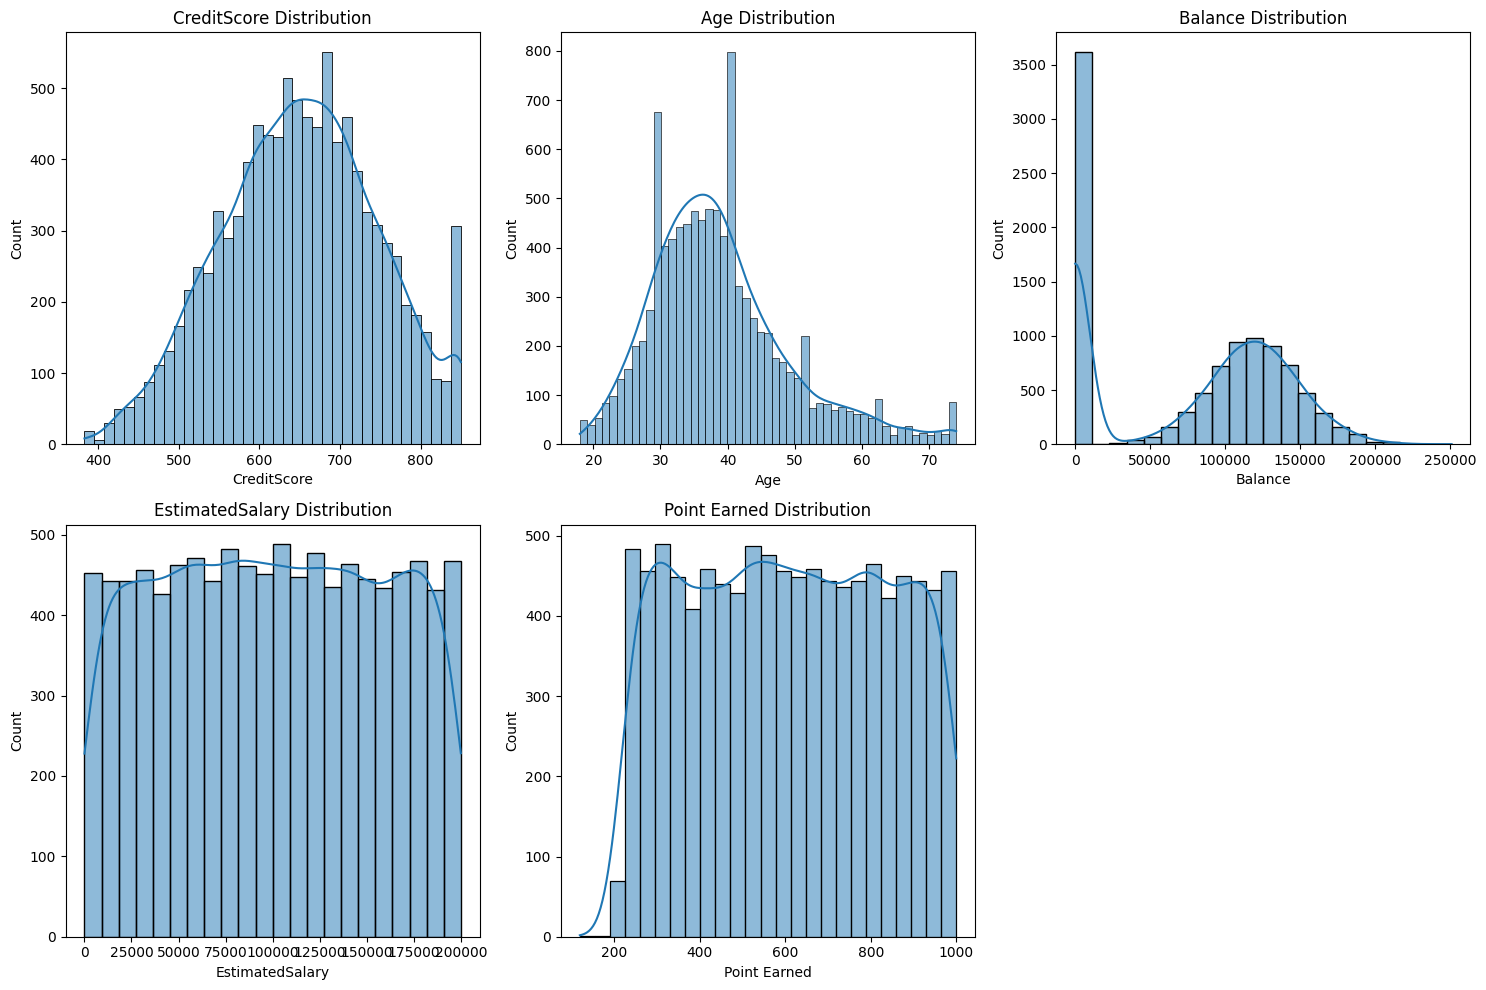

In [23]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'{column} Distribution')

plt.tight_layout()
plt.show()

Taking a look at the graphics we can see that Estimated Salary and Points Earned are pretty regular (except from the 200 points value with a lower count).
The Credit Score value is mostly concentrated in the middle around 650, in the Age, around 30 and 40 years, with a big count at 60 years caused by the limitation of the IQRat the outlier management, limitating it past 60. Looking at the balance, most users dont have any balance, even if most users appear to have a balance of around 125.000. 

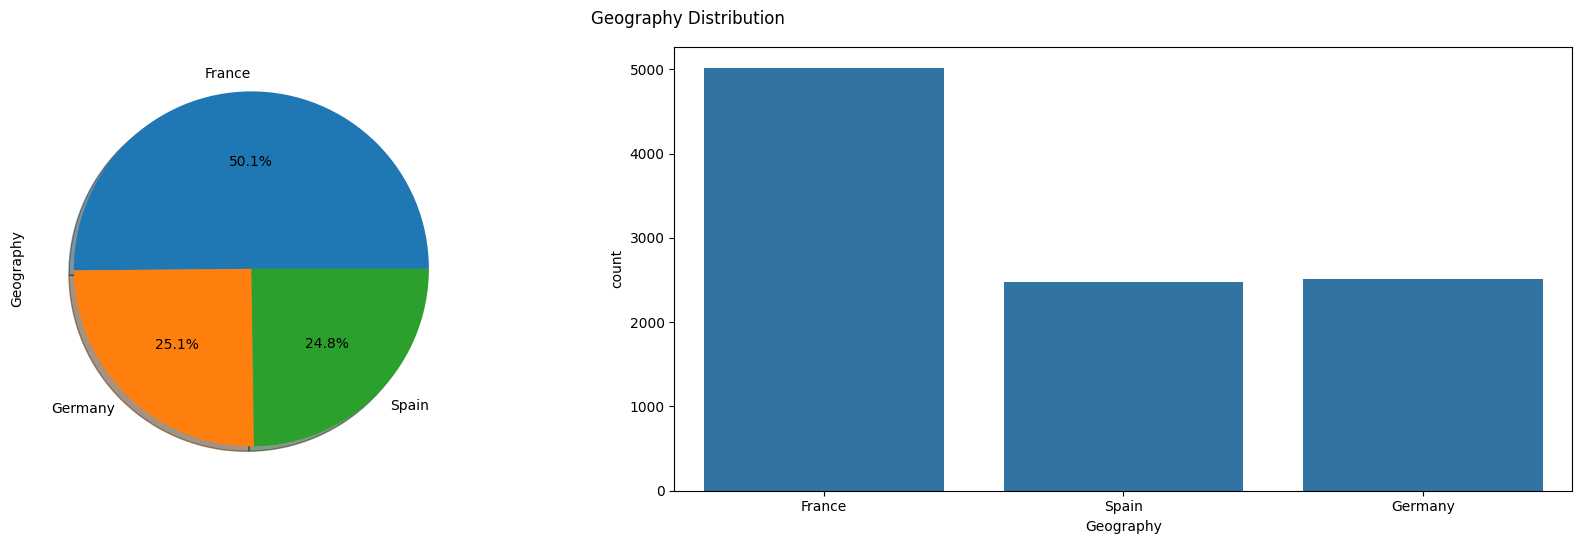

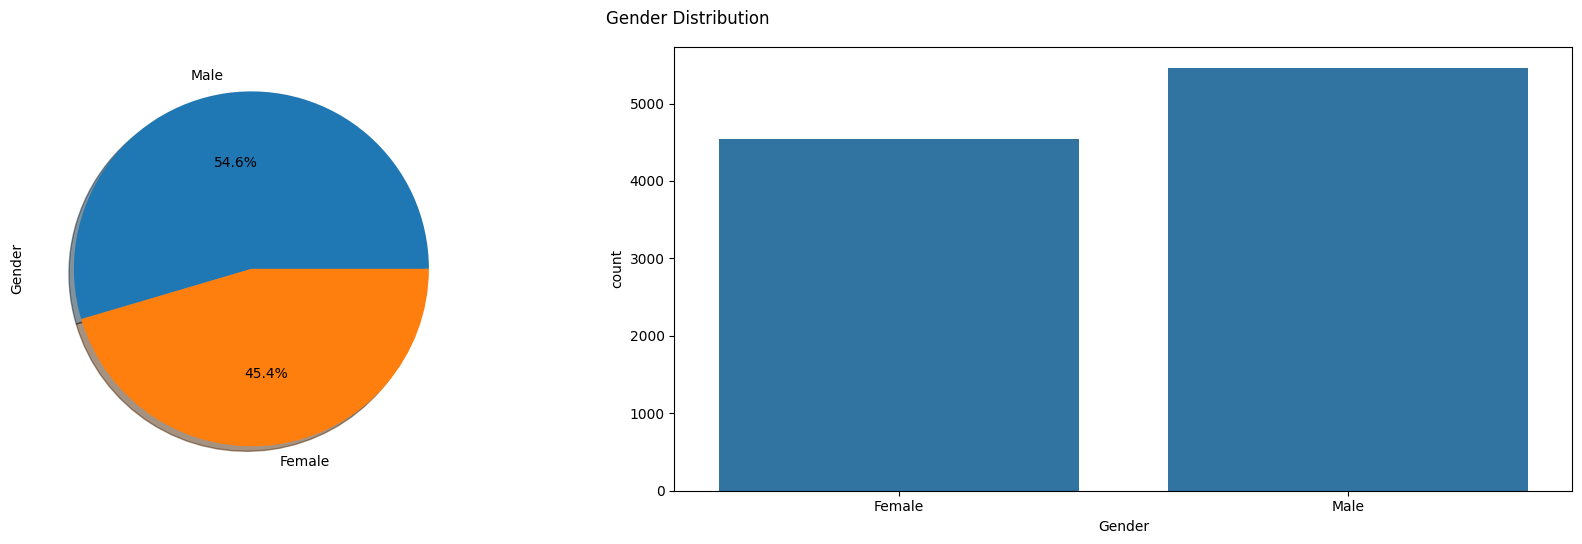

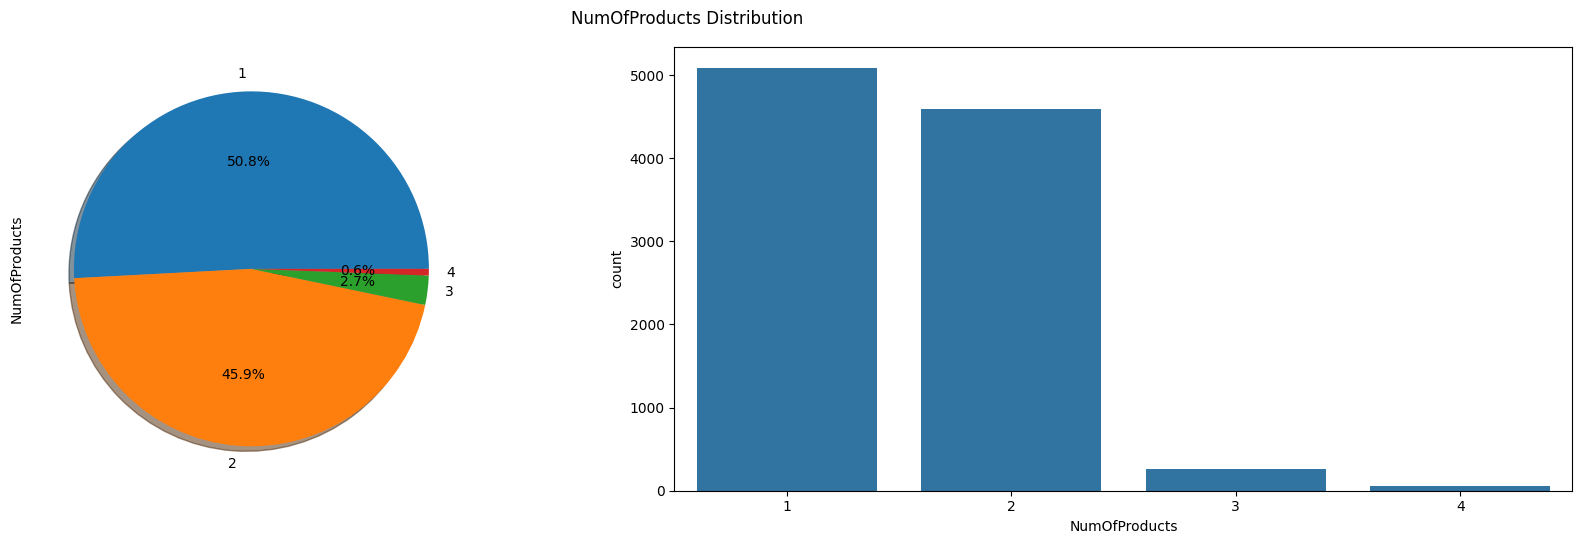

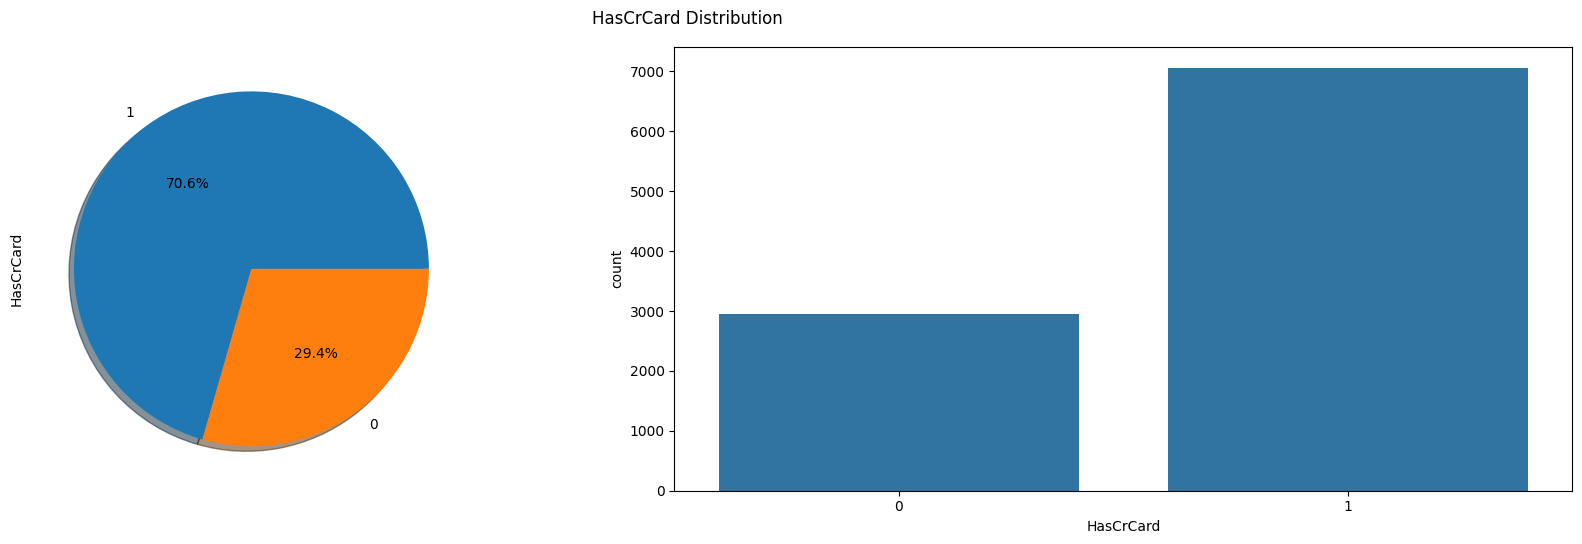

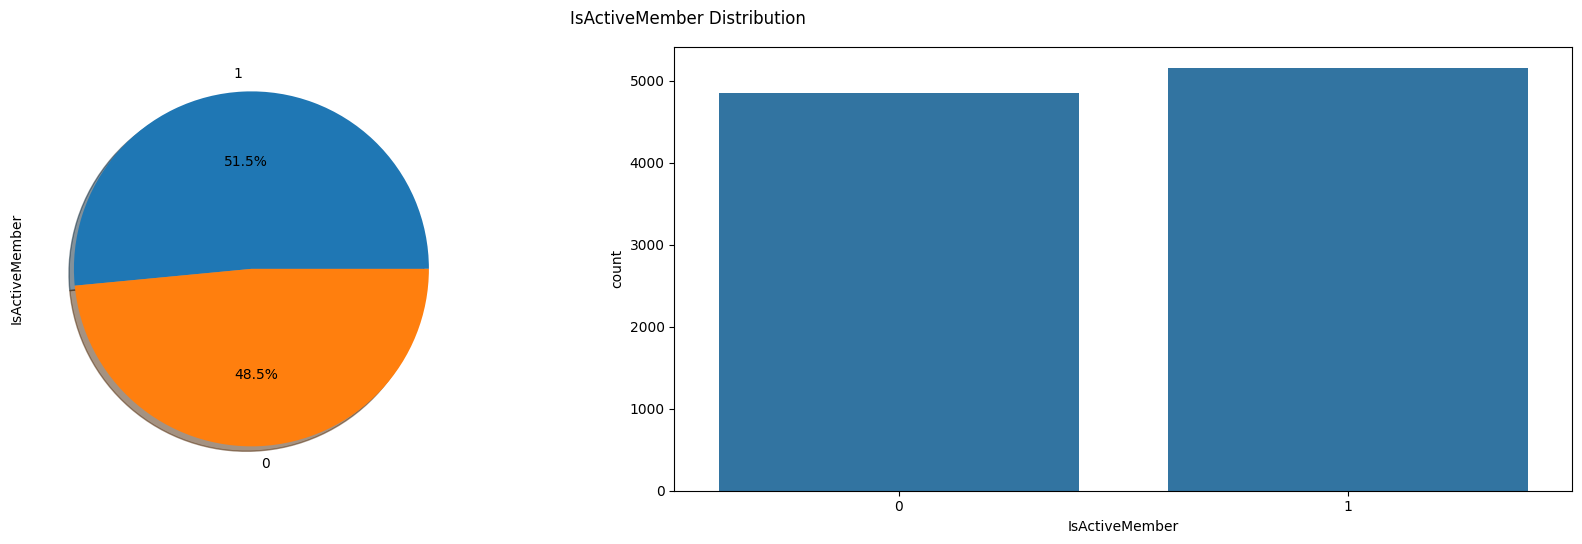

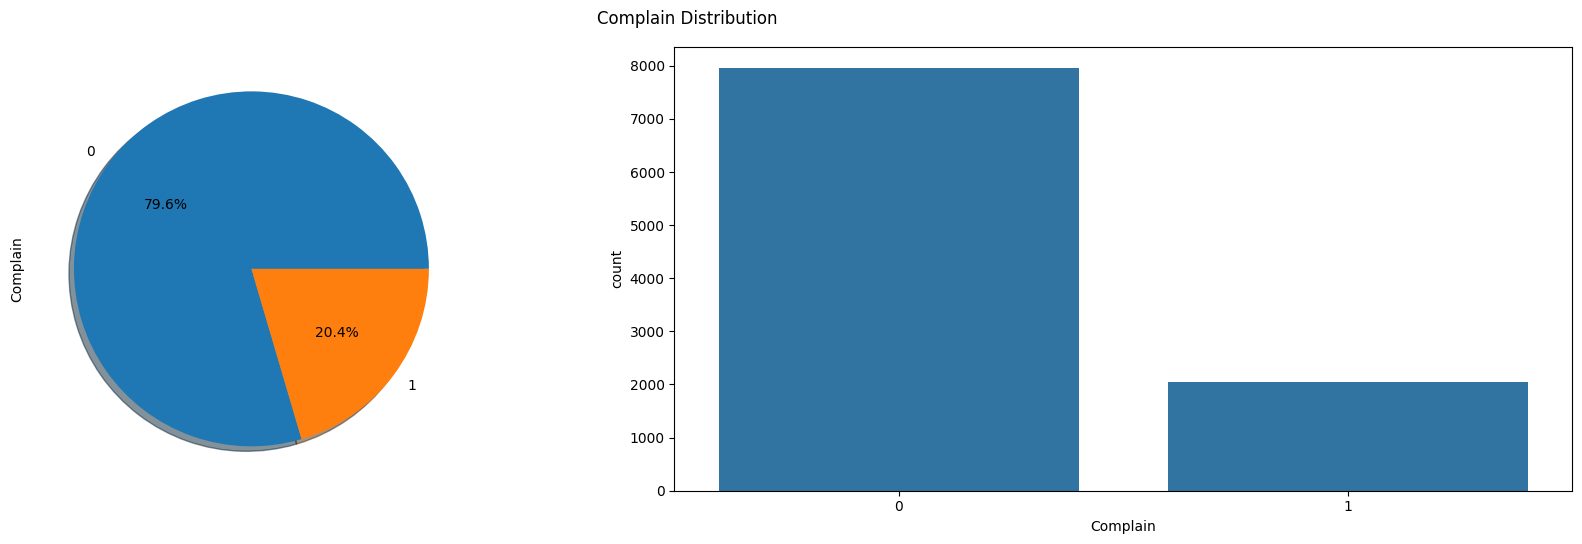

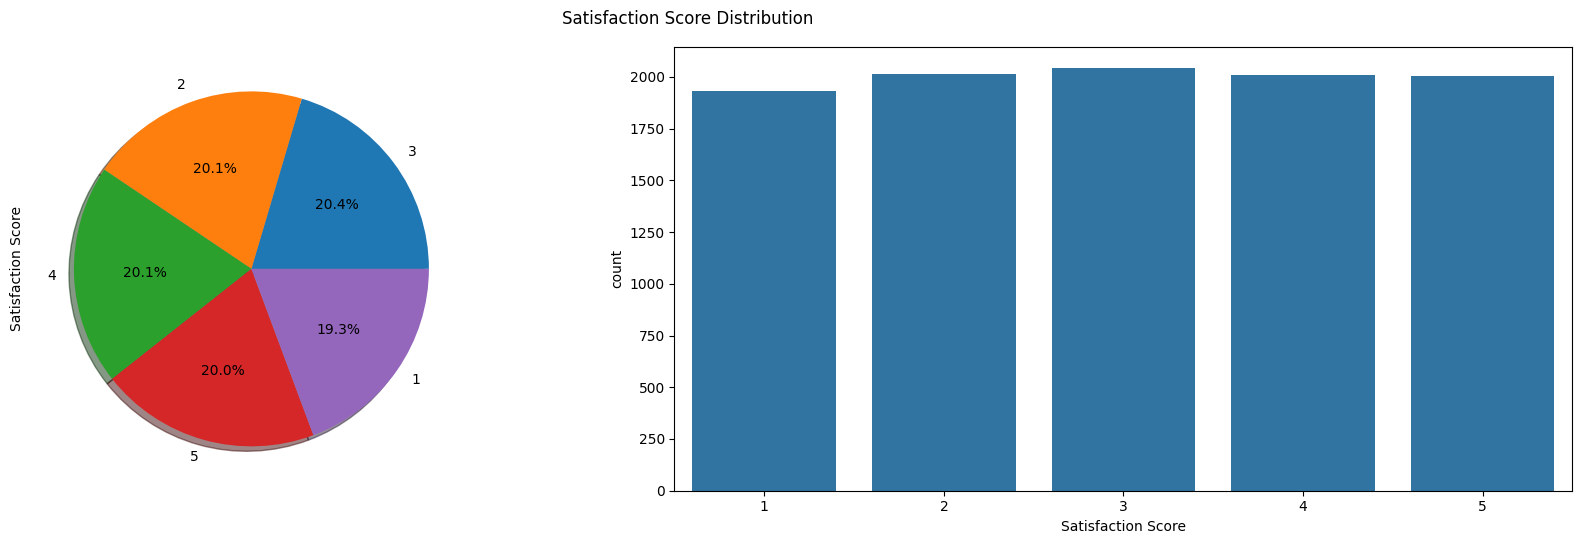

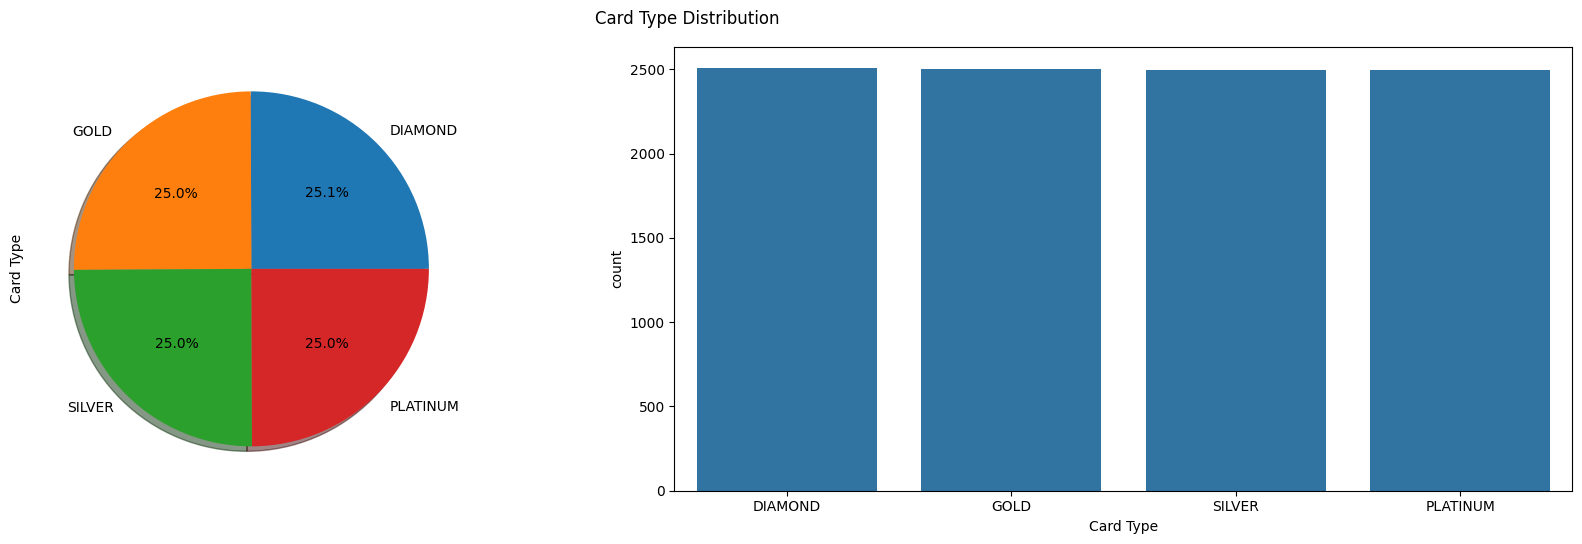

In [64]:
categorical_columns = ["Geography", "Gender",  "NumOfProducts", "HasCrCard", "IsActiveMember", "Complain", "Satisfaction Score", "Card Type"]

for column in categorical_columns:
    f, ax = plt.subplots(1, 2, figsize=(18, 5.5))

    data[column].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_ylabel(f'{column}')

    sns.countplot(x=column, data=data, ax=ax[1])

    plt.suptitle(f'{column} Distribution')
    plt.tight_layout()
    plt.show()



Solution:

Here we can see that isACtiveMember, Satisfaction Score and Card Type distributions are similar, but that is not the same case for the rest, as they are more or less equally distributed, but clearly not equally at least.

# 3. Data Transformation

- Data normalization and standardization

In [25]:
#data normalization and standardization

- New variables creation

In [26]:
#new variables creation

# 4. Uni, Bi and multivaraint analisis

relation between variants

In [27]:
#relation between variants

PCA? no

# 5. Data Visualization

In [28]:
#data visualization

# 6. CONCLUSSIONS